# acmg scaler R notebook

https://github.com/badonyi/acmgscaler/blob/main/acmgscaler.ipynb

# A tibble: 8 × 2
  evidence                   score
  <chr>                      <dbl>
1 b_very_strong|b_strong     NA   
2 b_strong|b_moderate        NA   
3 b_moderate|b_supporting    NA   
4 b_supporting|indeterminate NA   
5 indeterminate|p_supporting -3.05
6 p_supporting|p_moderate    -4.40
7 p_moderate|p_strong        NA   
8 p_strong|p_very_strong     NA   


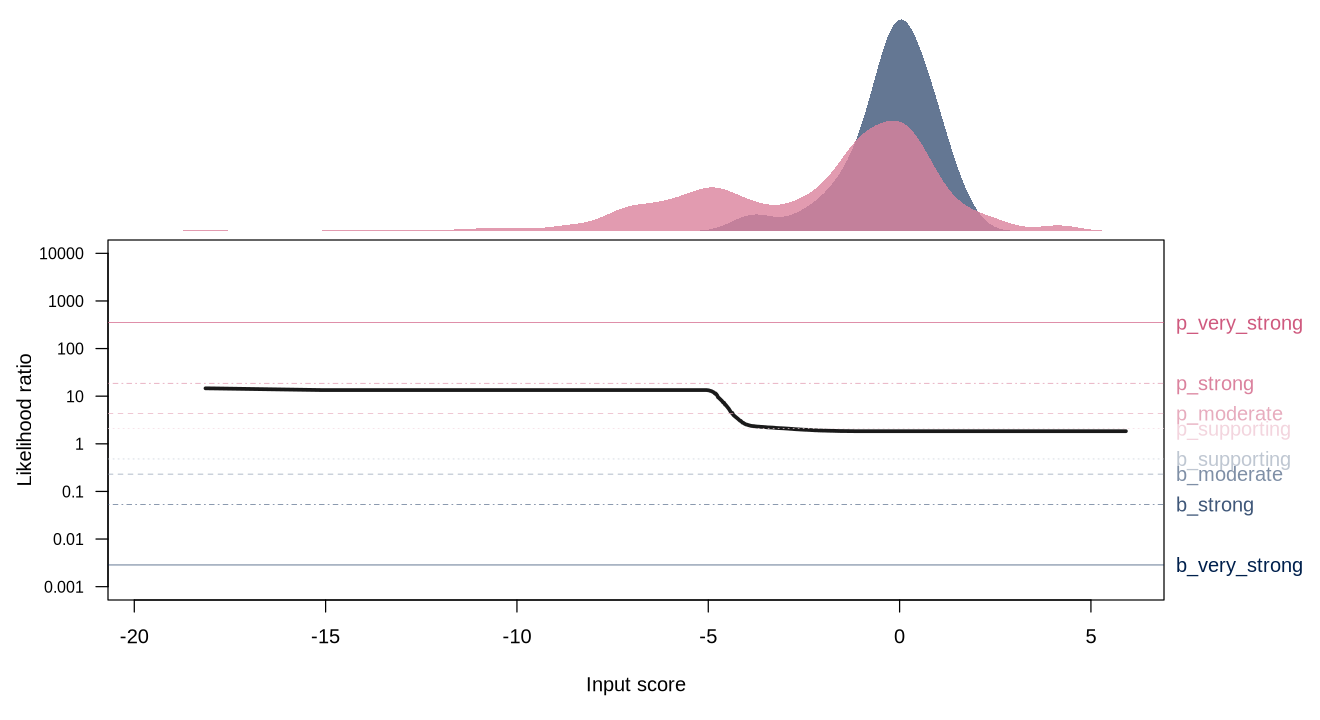

In [26]:
library(readr)

run_acmg_scaler <- function(df_input, prior = 0.1, bw = 'bcv'){
    df <- acmgscaler::add_likelihood_ratios(df_input, prior = prior, value = 'score')
    # Check data after cleaning
    # cat("Data summary after removing NAs:\n")
    # print(table(df$class, useNA = "ifany"))
    # cat("Score range:", range(df$score, na.rm = TRUE), "\n")
    
    df <- df[order(df$score), ]
    acmg_col <- c(
      b_very_strong = '#00204d',
      b_strong = '#3f5779',
      b_moderate = '#7f8fa6',
      b_supporting = '#bfc7d2',
      indeterminate = '#ffffff',
      p_supporting = '#f3d5de',
      p_moderate = '#e7acbe',
      p_strong = '#db829e',
      p_very_strong = '#cf597e'
    )
    
    pd <- suppressWarnings(density(df$score[df$class == 'P'], bw = bw, n = 1024))
    bd <- suppressWarnings(density(df$score[df$class == 'B'], bw = bw, n = 1024))
    
    xlim <- range(c(pd$x, bd$x))
    
    options(repr.plot.width = 11, repr.plot.height = 6)
    layout(matrix(c(1, 2), nrow = 2), heights = c(1, 2))
    par(mar = c(0, 4.5, 0, 6.5))
    plot(
      x = pd$x,
      y = pd$y,
      type = 'n',
      xlim = xlim,
      ylim = range(c(pd$y, bd$y)) * 1.05,
      axes = FALSE,
      xlab = '',
      ylab = ''
    )
    
    polygon(bd, col = adjustcolor(acmg_col[2], alpha.f = 0.8), border = NA)
    polygon(pd, col = adjustcolor(acmg_col[8], alpha.f = 0.8), border = NA)
    
    par(mar = c(5, 4.5, 0, 6.5))
    plot(
      x = df$score,
      y = df$score_lr,
      log = 'y',
      type = 'n',
      xlim = xlim,
      ylim = c(0.001, 10000),
      xlab = 'Input score',
      ylab = 'Likelihood ratio',
      yaxt = 'n'
    )
    
    x_vals <- c(df$score, rev(df$score))
    y_vals <- c(df$score_lr_lower, rev(df$score_lr_upper))
    polygon(
      x = x_vals,
      y = y_vals,
      col = adjustcolor('grey70', alpha.f = 0.8),
      border = NA
    )
    
    lines(
      x = df$score,
      y = df$score_lr,
      lwd = 3,
      col = 'gray10'
    )
    
    axis(
      2,
      at = c(0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000),
      labels = c('0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000'),
      las = 2,
      cex.axis = 0.8
    )
    
    t <- acmgscaler:::thresholds_upon_prior(prior)
    
    abline(
      h = t,
      col = acmg_col[-5],
      lty = c(1, 4, 2, 3, 3, 2, 4, 1),
      lwd = 0.5
    )
    
    mtext(
      names(acmg_col[-5]),
      col = acmg_col[-5],
      side = 4,
      at = t,
      las = 2,
      line = 0.5,
      cex = 1
    )
    
    print(acmgscaler::get_thresholds(df))
}

prior = 0.1
df <- read_csv("../dual_ipa/3_outputs/DUALIPA_allScores_acmgscaler.csv", show_col_types = FALSE)
run_acmg_scaler(df, prior=prior)